# O que vende um carro?

A atividade trata-se de uma análise de uma dataframe com as informações de propagandas de carros. O dataframe representaria um site, chamado Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no site todos os dias. Estudarei os dados coletados nos últimos anos e determinarei quais fatores influenciaram o preço de um veículo.

Em primeiro lugar, será feito o pré-processamento dos dados. O dataframe será analisado, procurando-se por valores ausentes, duplicados ou com formatação incorreta, e serão tratados. Encontrado valores ausentes, será investigado se existe alguma razão, então decidirei se serão substituídos. Em seguida, investigariei a necessidade de modelagem e criação de novas colunas do dataframe, para melhorar a análise. 

Sendo assim, a análise do dataframe será feita estudando os parâmetros como preço, idade do veículo, quando a propaganda foi colocada, etc. Para cada parâmetro será construido histogramas e outros gráficos, investigando a distribuição dos parâmetros e a existencia de valores atípicos. 

Em seguida, será estudado quantos dias as propagandas foram exibidas. Descrevendo o tempo de vida útil comum de uma propaganda. Determinarei quando as propagandas foram removidas rapidamente, e quando elas foram listadas por um tempo anormalmente longo. Analisarei o número de propagandas e o preço médio para cada tipo de veículo. Para demonstrar a relação, construirei um gráfico mostrando a dependência do número de propagandas em relação ao tipo de veículo.

Por fim, será visto quais fatores mais  influenciam o preço. Serão pegos os tipos populares detectados e será visto se os seus preços dependem da idade, quilometragem, condição, tipo de transmissão, etc. As categorias de variáveis categóricas analisadas precisam ter pelo menos 50 propagandas, de outro modo, seus parâmetros não serão válidos para análise.

## Iniciação

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


### Carregue dados

In [2]:
# Carregando o arquivo com os dados em um DataFrame
try:
    df = pd.read_csv("vehicles_us.csv")

except:
    df = pd.read_csv("/datasets/vehicles_us.csv")

### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- **`price`** -      preço do veículo
- **`model_year`** - ano de fabricação do veículo
- **`model`** -      modelo do veículo
- **`condition`** -  codição do veículo
- **`cylinders`** -  número de cilindros
- **`fuel`** —       gasolina, diesel etc.
- **`odometer`** —   a quilometragem do veículo quando a propaganda foi publicada 
- **`transmission`**-tipo de transmissão
- **`paint_color`**- cor do veículo
- **`is_4wd`** —     se o veículo é 4 por 4 (tipo Booleano)
- **`date_posted`**— a data que a propaganda foi publicada
- **`days_listed`**— dias desde a publicação até a retirada

In [3]:
#informações gerais/resumidas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# amostragem dos dados
display(df.head())


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [5]:
#Verificando o tipo de dado da coluna
df.dtypes 

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [6]:
# Nome das colunas
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

In [7]:
# Informações quantitativas sobre o DataFrame
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


Na primeira visualização foi encontrado alguns problemas que necessitam maiores investigações: 

- As colunas **`model_year`, `cylinders`, `odometer`, `paint_color`** e **`is_4wd`** possuem valores ausentes. 
- As colunas **`model_year`** e **`date_posted`** estão com os tipos *float64* e *object*, respectivamente, quando deveriam estar com o tipo *datetime*.
- As colunas **`model_year`**, **`is_4wd`**  e  **`cylinders`** estão com os tipos *float64*, quando deveriam ser do tipo *int64*.

Será vista a quantidade de valores ausentes e a existência de valores dupicados.

In [8]:
# Quantidade de valores ausentes
columns_nan = df.isna().sum().sort_values(ascending=False)
columns_nan_porc = columns_nan / df['price'].count()

print('Quantidade de valores nan:')
display(columns_nan.head())

print('\nProporcao de valores nan:')
display(columns_nan_porc.head())


Quantidade de valores nan:


is_4wd         25953
paint_color     9267
odometer        7892
cylinders       5260
model_year      3619
dtype: int64


Proporcao de valores nan:


is_4wd         0.503697
paint_color    0.179854
odometer       0.153168
cylinders      0.102086
model_year     0.070238
dtype: float64

A coluna **`is_4wd`** possui a maior quantidade de valores ausentes, com 25953, representando 50% dos valores da coluna. A segunda coluna com mais valores ausentes é  **`paint_color`** com 9267 ou 18% da coluna. As outras três colunas com valores ausentes possuem entre 7% a 15%. 

In [9]:
# Valores duplicados

df.duplicated().sum()

0

Não existem valores duplicados no dataframe.

Investigarei se a algum problema com os valores únicos nas colunas categóricas.

In [10]:
for x in df.columns:
    if df[x].dtype == 'object' and x!='date_posted':
        print(x)
        print(df[x].unique())
        print('\n\n')

model
['bmw x5' 'ford f-150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'chevrolet silverado' 'jeep wrangler' 'chevrolet malibu' 'ford fusion se'
 'chevrolet impala' 'chevrolet corvette' 'jeep liberty' 'toyota camry le'
 'nissan altima' 'subaru outback' 'toyota highlander' 'dodge charger'
 'toyota tacoma' 'chevrolet equinox' 'nissan rogue'
 'mercedes-benz benze sprinter 2500' 'honda cr-v' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet colorado' 'ford f150 supercrew cab xlt'
 'chevrolet camaro lt coupe 2d' 'chevrolet cruze' 'ford mustang'
 'chevrolet silverado 3500hd' 'nissan frontier crew cab sv'
 'subaru impreza' 'jeep grand cherokee laredo' 'nissan versa'
 'ford f-250 sd' 'chevrolet silverado 1500 crew' 'ford f250 super duty'
 'chevrolet cama

Parece haver duplicatas implícitas na coluna **`model`**, irá requerir maior investigação. Parece não haver nenhum problema de caixa alta ou variáveis iguais escritas de forma diferente nas outras colunas.

### Conclusões e próximos passos

A primeira investigação do dataframe indentificou alguns problemas que precisam serem corrigidos ante da análise. Sendo esse problemas, valores ausentes nas colunas **`model_year`, `cylinders`, `odometer`, `paint_color`** e **`is_4wd`**. O tipo de dado das colunas **`model_year`**, **`date_posted`**, **`is_4wd`**  e  **`cylinders`** estão incorretos.  Na coluna **`model`** existem  duplicatas implícitas.


Em relação as colunas com variáveis quantitativas, a primeira vista, para não haver valores atípicos Não foram encontrados valores duplicados. Não foram encontrados problemas de formatação nos nomes das colunas.

Primeiro serão tratados os valores ausentes e então as duplicatas implicitas. Os tipos de dados das colunas serão as últimas a serem tratadas.

## Correção dos valores ausentes

Serão tratados os valores ausentes de cada coluna. Começando com uma investigação do motivo de haver valores ausentes nas colunas. As colunas são: 
- **`is_4wd`** - Com 25953 valores ausentes ou 50% dos valores da coluna.
- **`paint_color`** - Com 9267 valores ausentes ou 18% dos valores da coluna.
- **`odometer`** -Com 7892 valores ausentes ou 15% dos valores da coluna.
- **`cylinders`** -Com 5260 valores ausentes ou 10% dos valores da coluna.
- **`model_year`** -Com 3619 valores ausentes ou 7% dos valores da coluna.

Investigação da coluna **`is_4wd`**:

In [11]:
# Valores quantitativos da coluna
display(df['is_4wd'].describe().reset_index())

# Valores iguais a zero na coluna
print('\nValores iguais a 0("nao"):')
print(len(df.query('is_4wd == 0')))

,index,is_4wd
0,count,25572.0
1,mean,1.0
2,std,0.0
3,min,1.0
4,25%,1.0
5,50%,1.0
6,75%,1.0
7,max,1.0



Valores iguais a 0("nao"):
0


A coluna **`is_4wd`** representa se o veículo é 4 por 4, com 1 sendo *sim* e 0 *não*. Não há nenhum valor 0 na coluna, logo, suponho que os valores ausentes são de variáveis 0.

In [12]:
# Correção dos valores da coluna is_4wd
df['is_4wd'].fillna(0,inplace=True)

# Verificação da coluna is_4wd
display(df['is_4wd'].describe().reset_index())

# Quantidade de valores ausentes
print('\nQuantidade de valores ausentes:')
display(df['is_4wd'].isna().sum())

,index,is_4wd
0,count,51525.000000
1,mean,0.496303
2,std,0.499991
3,min,0.000000
4,25%,0.000000
5,50%,0.000000
6,75%,1.000000
7,max,1.000000



Quantidade de valores ausentes:


0

Valores ausentes da coluna **`is_4wd`** foram substituídos.

Investigação da coluna **`paint_color`**:

In [13]:
#Visualização da coluna paint_color com valores ausentes
df.query('paint_color.isna()').head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,0.0,2018-08-22,8
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,0.0,2018-07-26,43
31,11999,2017.0,toyota camry le,excellent,4.0,gas,35721.0,automatic,sedan,NaN,0.0,2018-09-13,25
34,9500,2008.0,toyota highlander,good,6.0,gas,149799.0,automatic,SUV,NaN,0.0,2018-06-04,121
35,14999,2015.0,dodge charger,good,6.0,gas,63037.0,automatic,sedan,NaN,0.0,2018-05-11,37
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,0.0,2018-05-05,22


In [14]:
# Value_counts na coluna paint_color
display(df['paint_color'].value_counts(dropna=False).reset_index())

,index,paint_color
0,white,10029
1,NaN,9267
2,black,7692
3,silver,6244
4,grey,5037
5,blue,4475
6,red,4421
7,green,1396
8,brown,1223
9,custom,1153


A coluna **`paint_color`** representa a cor do veículo. Possui os valores ausentes como a segunda categoria com mais comum e não parece ter relação aos valores ausentes das outras colunas. Intuitivamente a cor do carro deve possuir relação com o modelo, com cada modelo possuindo uma cor mais frequente. Sendo assim, para não deletar os dados foi decidido por preencher essa a coluna **`paint_color`** utilizando a moda, maior frequência absoluta, da coluna **`model`**.

In [15]:
df['paint_color'].fillna( df.groupby(['model'])['paint_color'].transform(lambda x : x.mode()[0]), inplace = True)

display(df['paint_color'].value_counts(dropna=False).reset_index())

print('\nQuantidade de valores ausentes:')
display(df['paint_color'].isna().sum())

,index,paint_color
0,white,13835
1,black,9897
2,silver,7998
3,grey,5843
4,blue,4729
5,red,4705
6,green,1554
7,brown,1223
8,custom,1153
9,yellow,255



Quantidade de valores ausentes:


0

Valores ausentes da coluna **`paint_color`** foram substituídos.

Investigação da coluna **`cylinders`**:

In [16]:
#Visualização da coluna cylinders com valores ausentes
df.query('cylinders.isna()').head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,black,0.0,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,white,0.0,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,0.0,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
75,6950,2005.0,chevrolet tahoe,excellent,NaN,gas,186021.0,automatic,SUV,black,1.0,2018-10-30,3
87,8499,2009.0,bmw x5,good,NaN,gas,104482.0,automatic,SUV,blue,1.0,2019-03-04,52
119,14800,2016.0,kia sorento,like new,NaN,gas,NaN,automatic,SUV,brown,0.0,2019-02-27,93
126,25900,2012.0,chevrolet silverado 1500 crew,good,NaN,other,NaN,other,pickup,white,1.0,2018-08-31,44


In [17]:
df.pivot_table(index='model',values='price',columns='cylinders',aggfunc='count')

cylinders,3.0,4.0,5.0,6.0,8.0,10.0,12.0
model,,,,,,,
acura tl,NaN,3.0,NaN,208.0,NaN,NaN,NaN
bmw x5,NaN,NaN,NaN,200.0,51.0,NaN,NaN
buick enclave,NaN,1.0,NaN,245.0,1.0,NaN,NaN
cadillac escalade,NaN,NaN,NaN,3.0,290.0,1.0,NaN
chevrolet camaro,NaN,9.0,NaN,223.0,106.0,34.0,NaN
...,...,...,...,...,...,...,...
toyota sienna,NaN,8.0,NaN,285.0,1.0,NaN,NaN
toyota tacoma,NaN,240.0,2.0,486.0,2.0,NaN,NaN
toyota tundra,NaN,1.0,NaN,33.0,500.0,13.0,NaN


Modelos de carros podem possuir mais de uma quantidade de cilindros.

Não foi encontrado uma causa para a existência dos valores ausentes. Para substituir os valores será usado a coluna **`model`**, pois a quantidade de cilindros depende do modelo do carro, mas um mesmo modelo pode possuir quantidades diferentes de cilindros, então será usada a moda para substituir. A mediana não pode ser usada, pois, se o modelo de carro possuir duas quantidades de cilindros a mediana será um número irreal.

In [18]:
df['cylinders'].fillna( df.groupby(['model'])['cylinders'].transform(lambda x : x.mode()[0]), inplace = True)

print('\nQuantidade de valores ausentes:')
display(df['cylinders'].isna().sum())


Quantidade de valores ausentes:


0

Valores ausentes da coluna **`cylinders`** foram substituídos.

Investigação da coluna **`odometer`**:

In [19]:
#Visualização da coluna cylinders com valores ausentes
df.query('odometer.isna()').head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,white,0.0,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,0.0,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,silver,0.0,2018-07-26,43
29,5495,2010.0,chevrolet impala,excellent,6.0,gas,NaN,automatic,sedan,white,0.0,2019-02-18,20
38,7999,2015.0,chrysler 200,good,4.0,gas,NaN,automatic,sedan,black,0.0,2019-03-08,29
41,11995,2017.0,nissan rogue,like new,4.0,gas,NaN,automatic,SUV,silver,1.0,2018-09-20,21
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2019-01-15,16
56,4200,2006.0,jeep grand cherokee,excellent,6.0,gas,NaN,automatic,SUV,white,1.0,2018-07-01,79


In [20]:
# Tabela entre coluna condition e odometer
df.pivot_table(index='condition',values='odometer',aggfunc=['mean','median','count'])

,mean,median,count
,odometer,odometer,odometer
condition,,,
excellent,106687.682258,104230.0,20973
fair,183062.233577,181613.0,1370
good,129919.930980,129000.0,17053
like new,79426.738166,72982.5,4014
new,43476.056000,8002.0,125
salvage,140919.989796,142673.5,98


Será usada a mediana de **`odometer`** em relação as categorias da coluna **`condition`** para substituir os valores ausentes.

In [21]:
subst = df.groupby('condition')['odometer'].transform('median')
df['odometer'].fillna(subst, inplace=True)

print('\nQuantidade de valores ausentes:')
display(df['odometer'].isna().sum())


Quantidade de valores ausentes:


0

Valores ausentes da coluna **`paint_color`** foram substituídos.

Investigação da coluna **`model_year`**:

In [22]:
#Visualização da coluna model_year com valores ausentes
df.query('model_year.isna()').head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,0.0,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,4.0,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
84,4995,NaN,hyundai elantra,like new,4.0,gas,151223.0,automatic,sedan,custom,0.0,2018-09-15,1
102,10800,NaN,chevrolet colorado,excellent,5.0,gas,114922.0,automatic,truck,red,1.0,2018-06-23,35
114,23700,NaN,nissan frontier crew cab sv,good,6.0,gas,12901.0,other,pickup,black,1.0,2018-09-21,8
116,25300,NaN,chevrolet camaro lt coupe 2d,good,6.0,gas,3568.0,other,coupe,black,0.0,2018-06-16,34
144,8995,NaN,chevrolet silverado 1500,excellent,8.0,gas,119726.0,automatic,truck,grey,1.0,2019-03-18,27


In [23]:
# Tabela entre coluna model e model_year
df.pivot_table(index='model',values='model_year',aggfunc=['median','count'])

,median,count
,model_year,model_year
model,,
acura tl,2007.0,224
bmw x5,2010.0,246
buick enclave,2012.0,257
cadillac escalade,2009.0,295
chevrolet camaro,2013.0,392
...,...,...
toyota sienna,2008.0,308
toyota tacoma,2010.0,769


Será usada a moda de **`model`** em relação a as categorias da coluna **`model_year`** para substituir os valores ausentes.

In [24]:
subst = df.groupby('model')['model_year'].transform(lambda x : x.mode()[0])
df['model_year'].fillna(subst, inplace=True)

print('\nQuantidade de valores ausentes:')
display(df['model_year'].isna().sum())


Quantidade de valores ausentes:


0

Valores ausentes da coluna **`model_year`** foram substituídos.

In [25]:
# Conferindo se ainda existem valores ausentes
df.isna().sum().sort_values(ascending=False)

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

Todos os valores ausentes foram corrigidos.

### Correção das duplicatas implícitas

Na coluna **`model`** existem duplicatas implícitas que precisam ser corrigidas.

In [26]:
df['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [27]:
# Contando quantidade de valores unicos
len(df['model'].unique())

100

A coluna **`model`** apresenta duplicatas implícitas em carros da marca ford, modelos f-150, f-250 e f-350. As variações possuem sem traço, ou "super duty"( todos os modelos "f" são super duty) ou sd. Suas varifações são:
- ford f-150- f150;
- ford f-250- f250, f-250 sd, f-250 super duty, f250 super duty;
- ford f-350- f350, f-350 sd, f350 super duty, f350 sd.

In [28]:
df['model'] = df['model'].replace(['ford f250 super duty','ford f-250 super duty', 'ford f-250 sd','ford f250 sd','ford f250'], 'ford f-250')
df['model'] = df['model'].replace(['ford f350 super duty','ford f-350 sd','ford f350 sd','ford f350'], 'ford f-350')
df['model'] = df['model'].replace('ford f150', 'ford f-150')


In [29]:
df['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [30]:
# Contando quantidade de valores unicos
len(df['model'].unique())

93

As duplicatas implícitas foram substituídas.

## Correção dos tipos de dados

Os tipos de dados das colunas **`model_year`**, **`date_posted`**, **`is_4wd`**  e  **`cylinders`** serão corrigidos:
- As colunas **`is_4wd`**, **`model_year`**  e **`cylinders`** são *float64*, devem ser *int64*.
- A coluna **`date_posted`** é *object*, deve ser *datatime*.

In [31]:
# Transformando as colunas em int
df[['is_4wd','cylinders','model_year']] = df[['is_4wd','cylinders','model_year']].astype(int)

print(df[['is_4wd','cylinders','model_year']].dtypes)

is_4wd        int64
cylinders     int64
model_year    int64
dtype: object


In [32]:
#Visualização da coluna date_posted
df['date_posted'][0]

'2018-06-23'

In [33]:
# Transformando as colunas em datatime
df['date_posted']= pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

print(df['date_posted'].dtypes)

datetime64[ns]


## Enriqueça os dados

Para melhorar a análise serão adicionados quatro colunas, uma para o dia em que a propaganda foi postada, uma para a idade do veículo, uma para a quilometragem por ano, e uma para representar a coluna de condição por através de números.

In [34]:
# Amostragem dos dados
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,black,1,2018-06-23,19
1,25500,2013,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,white,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28


Criação da coluna **`day_posted`**:

In [35]:
# Valores data/hora para quando a propaganda estiver colocada
df['day_posted'] = df['date_posted'].dt.weekday

# Faixas de day_posted dos veiculos
print('Faixas de day_posted dos veiculos:')
display(pd.qcut(df['day_posted'], q = 4).value_counts())


Faixas de day_posted dos veiculos:


(1.0, 3.0]       14809
(3.0, 5.0]       14726
(-0.001, 1.0]    14634
(5.0, 6.0]        7356
Name: day_posted, dtype: int64

Criação da coluna **`age`**:

In [36]:
# Idade do veículo quando a propaganda for colocada
df['age'] = pd.DatetimeIndex(df['date_posted']).year - df['model_year'] 

# Faixas de idade dos veiculos
print('Faixas de idade dos veiculos:')
display(pd.cut(df['age'], bins = 5).value_counts())



Faixas de idade dos veiculos:


(-0.11, 22.0]    50464
(22.0, 44.0]       931
(44.0, 66.0]       124
(66.0, 88.0]         3
(88.0, 110.0]        3
Name: age, dtype: int64

Criação da coluna **`odo_year`**:

In [37]:
# Quilometragem média por ano
df['odo_year'] = df['odometer'] / df['age']

# Média de quilometragem média por ano
df['odo_year'].mean()

inf

In [38]:
len(df.query('age == 0'))

2178

A coluna **`odo_year`** teve um problema, como a coluna **`age`** possui alguns valores zero, essas varíaveis não tiverem um número real como resultado. Será criada uma função para corrigir, os carros com menos de um ano terão a quilometragem por ano igual a quilometragem.

In [39]:
# Função para coorigir coluna odo_year
def calc_odo_year(data):
    if data['age'] == 0:
        return data['odometer']
    return data['odo_year']



In [40]:
df['odo_year'] = df.apply(calc_odo_year,axis=1)

In [41]:
# Média de quilometragem média por ano
df['odo_year'].mean()

19436.079495493916

Criação da coluna **`condition_index`**:

In [42]:
df['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [43]:
def categ_condition(data):
    if 'salvage' in data['condition']:
        return 0
    if 'fair' in data['condition']:
        return 1
    if 'good' in data['condition']:
        return 2
    if 'excellent' in data['condition']:
        return 3
    if 'like new' in data['condition']:
        return 4
    if 'new' in data['condition']:
        return 5

In [44]:
df['condition_index'] = df.apply(categ_condition,axis=1)

print(df['condition_index'].value_counts())

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition_index, dtype: int64


## Verifique os dados limpos

Os dados estão prontos para análise. Uma última olhada para encontrar quais variáveis serão úteis para a análise.

In [45]:
# Informações gerais/resumidas sobre o DataFrame
display(df.info())

# Informações quantitativas sobre o DataFrame
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  int64         
 1   model_year       51525 non-null  int64         
 2   model            51525 non-null  object        
 3   condition        51525 non-null  object        
 4   cylinders        51525 non-null  int64         
 5   fuel             51525 non-null  object        
 6   odometer         51525 non-null  float64       
 7   transmission     51525 non-null  object        
 8   type             51525 non-null  object        
 9   paint_color      51525 non-null  object        
 10  is_4wd           51525 non-null  int64         
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  day_posted       51525 non-null  int64         
 14  age              51525 non-null  int64

None

,price,model_year,cylinders,odometer,is_4wd,days_listed,day_posted,age,odo_year,condition_index
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.871033,6.121494,115199.014508,0.496303,39.55476,3.005434,8.436429,19436.079495,2.637535
std,10040.803015,6.145084,1.657296,60484.863376,0.499991,28.20427,1.997759,6.158509,17040.199641,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,75668.000000,0.000000,19.00000,1.000000,4.000000,10426.071429,2.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,0.000000,33.00000,3.000000,7.000000,15126.545455,3.000000
75%,16839.000000,2014.000000,8.000000,147821.000000,1.000000,53.00000,5.000000,12.000000,22428.571429,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000,6.000000,110.000000,373200.000000,5.000000


In [46]:
# Amostragem dos dados
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,age,odo_year,condition_index
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,black,1,2018-06-23,19,5,7,20714.285714,2
1,25500,2013,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,5,17741.000000,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,white,0,2019-03-22,9,4,16,11350.812500,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,2,40451.500000,3
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2,4,14488.500000,3
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,3,3,26404.000000,3
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,0,6,18245.500000,3
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,silver,1,2018-07-16,19,0,6,17362.333333,3
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,4,11,13381.000000,3


In [47]:
# Amostragem dos dados
df.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,age,odo_year,condition_index
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,2,5,17627.200000,4
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,2,16,11343.750000,0
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,3,9,14222.222222,3
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,0,5,27914.600000,2
51524,6300,2014,nissan altima,good,4,gas,129000.0,automatic,sedan,grey,0,2018-06-05,10,1,4,32250.000000,2


In [48]:
# Amostragem da correlação entre variaveis quantitativas
display(df.corr())

,price,model_year,cylinders,odometer,is_4wd,days_listed,day_posted,age,odo_year,condition_index
price,1.000000,0.409826,0.300448,-0.393550,0.315145,-0.000682,-0.000343,-0.408579,0.217170,0.221518
model_year,0.409826,1.000000,-0.145403,-0.431815,0.039764,-0.005229,-0.007149,-0.997189,0.471789,0.266694
cylinders,0.300448,-0.145403,1.000000,0.085640,0.407433,0.003176,-0.003558,0.145058,-0.041614,-0.065569
odometer,-0.393550,-0.431815,0.085640,1.000000,0.033317,0.003347,0.001660,0.430329,0.115146,-0.322576
is_4wd,0.315145,0.039764,0.407433,0.033317,1.000000,0.002003,0.003207,-0.039863,0.039754,0.012856
days_listed,-0.000682,-0.005229,0.003176,0.003347,0.002003,1.000000,0.002734,0.006062,-0.002091,-0.002404
day_posted,-0.000343,-0.007149,-0.003558,0.001660,0.003207,0.002734,1.000000,0.006573,-0.002115,0.001152
age,-0.408579,-0.997189,0.145058,0.430329,-0.039863,0.006062,0.006573,1.000000,-0.478726,-0.265829
odo_year,0.217170,0.471789,-0.041614,0.115146,0.039754,-0.002091,-0.002115,-0.478726,1.000000,0.044397
condition_index,0.221518,0.266694,-0.065569,-0.322576,0.012856,-0.002404,0.001152,-0.265829,0.044397,1.000000


## Estudando os parâmetros fundamentais

Agora será feito uma análise univariada das colunas que foram consideradas relevantes para o preço. Será usado histogramas e boxplots. Os parâmetros são:
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

In [49]:
def hist_graph(data,x_bins, x_range, title, xlabel):
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins= x_bins, range = x_range)
    plt.title(title,  fontsize = 16)
    plt.ylabel('Quantidade de Veículos', fontsize = 15)
    plt.xlabel(xlabel,  fontsize = 15)
    plt.show()

In [50]:
def bar_graph(data, title, xlabel):
    plt.figure(figsize=(8, 6))
    data.value_counts().plot(kind='bar')
    plt.title(title, fontsize = 16)
    plt.ylabel('Quantidade de Veículos', fontsize = 15)
    plt.xticks(rotation = 75)
    plt.xlabel(xlabel,fontsize = 15);
    plt.show()

In [51]:
def box_graph(dt, title, ylabel):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data = dt, orient="h", showmeans=True);
    plt.yticks(rotation = 90)
    plt.title(title, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 15)
    plt.show()

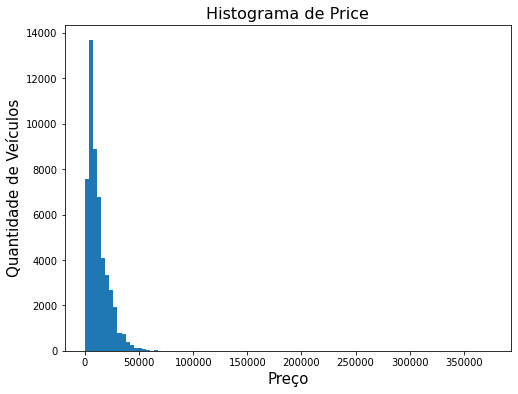

None

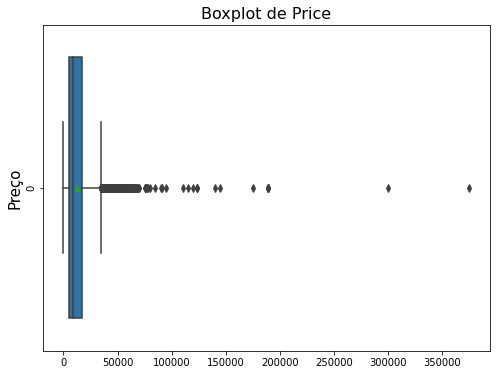

None

In [52]:
# Histograma de Price
display(hist_graph(df['price'], 100, (df['price'].min(),df['price'].max()) ,'Histograma de Price', 'Preço'))

# Boxplot de Price
display(box_graph(df['price'], 'Boxplot de Price', 'Preço'))

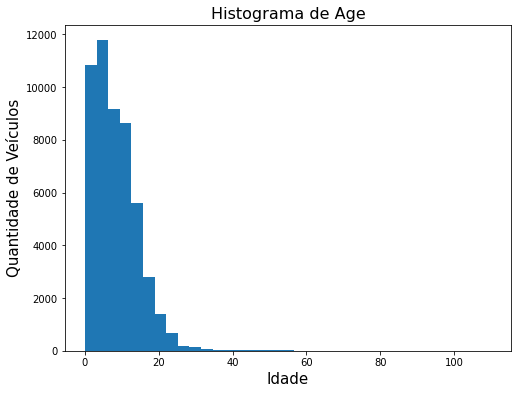

None

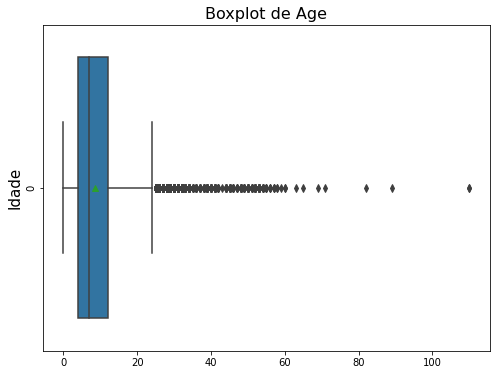

None

In [53]:
# Histograma de Age
display(hist_graph(df['age'], 35, (df['age'].min(),df['age'].max()) ,'Histograma de Age', 'Idade'))

# Boxplot de Age
display(box_graph(df['age'], 'Boxplot de Age', 'Idade'))

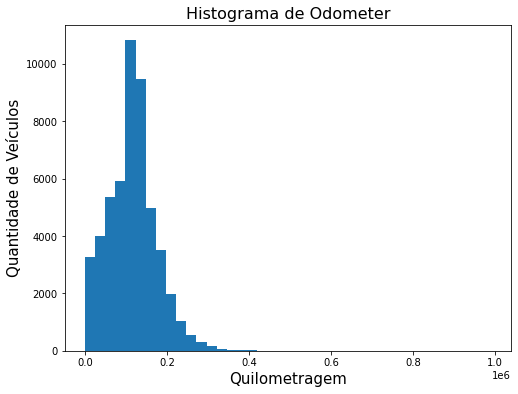

None

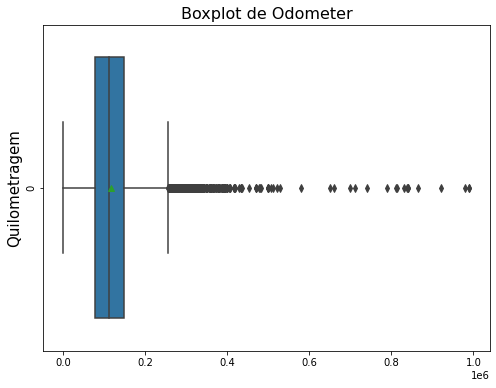

None

In [54]:
# Histograma de Odometer
display(hist_graph(df['odometer'], 40, (df['odometer'].min(),df['odometer'].max()) ,'Histograma de Odometer', 'Quilometragem'))

# Boxplot de Odometer
display(box_graph(df['odometer'], 'Boxplot de Odometer', 'Quilometragem'))

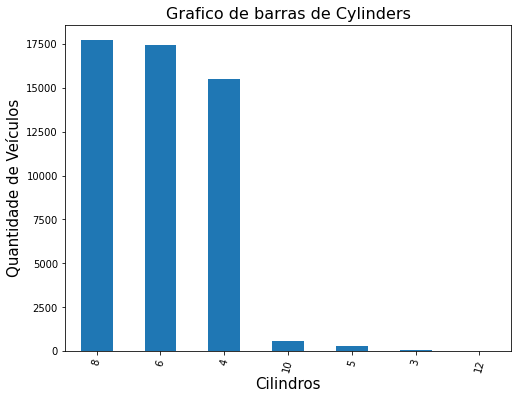

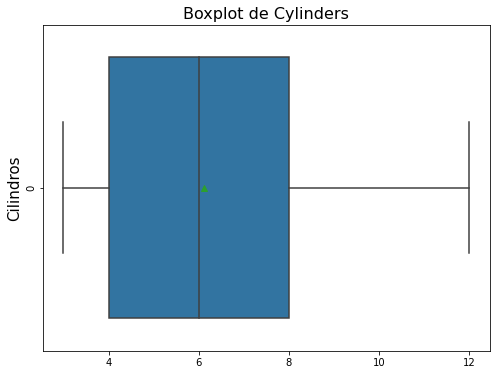

None

In [55]:
# Grafico de barras de Cylinders
bar_graph(df['cylinders'], 'Grafico de barras de Cylinders', 'Cilindros')

# Boxplot de Cylinders
display(box_graph(df['cylinders'], 'Boxplot de Cylinders', 'Cilindros'))

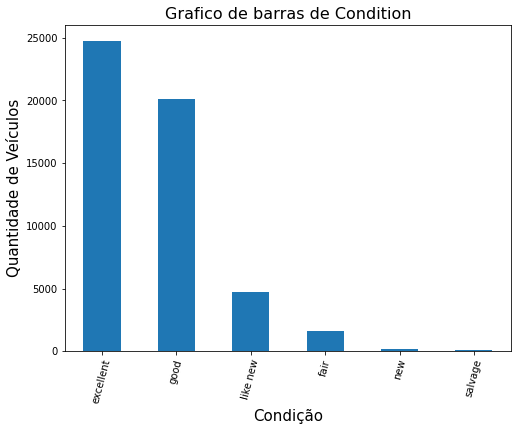

In [56]:
# Grafico de barras de Condition
bar_graph(df['condition'], 'Grafico de barras de Condition', 'Condição')

Foi percebido que existência de muitos valores ausentes nas colunas **`price`**, **`age`** e **`odometer`**, o que afeta a análise.

## Cuidando dos valores atípicos

Para que os gráficos demonstrem com mais clareza as distribuições, e com os valores atípicos afetando negativamente, foi decidido que será criado um novo dataframe sem os valores atípicos das colunas **`price`**, **`age`** e **`odometer`**. Os valores atípicos são definidos como os valores acima do intervalo interquartil. Como as varíveis dessas colunas começam em zero, será calculado apenas o limite superior.

In [57]:
#Calculando o intervalo interquartil 
price_IQR = df['price'].quantile(0.75) - df['price'].quantile(0.25)

odometer_IQR = df['odometer'].quantile(0.75) - df['odometer'].quantile(0.25)

age_IQR = df['age'].quantile(0.75) - df['age'].quantile(0.25)

In [58]:
# Determinando o limite superior para valores atípicos de Price
price_lim = df['price'].quantile(0.75) +  1.5 * price_IQR

# Determinando o limite superior para valores atípicos de Odometer
odometer_lim = df['odometer'].quantile(0.75) +  1.5 * odometer_IQR

# Determinando o limite superior para valores atípicos de Age
age_lim = df['age'].quantile(0.75) +  1.5 * age_IQR

In [59]:
len(df.query('price <100'))

863

In [60]:
# Armazene os dados sem os valores atípicos em um DataFrame separado
df_clean = df.query('(price < @price_lim) and (price > 100) and (odometer < @odometer_lim) and (age < @age_lim)')


In [61]:
(len(df_clean) / len(df))

0.9178262979136341

O novo dataframe foi criado em **df_clean**, ele possui 93,44% do dataframe original.

## Estude os parâmetros fundamentais sem valores atípicos

A análise univariada será refeita com o novo dataframe. Será visto o novo histograma e o novo boxplot, o histograma será comparado com o antigo.

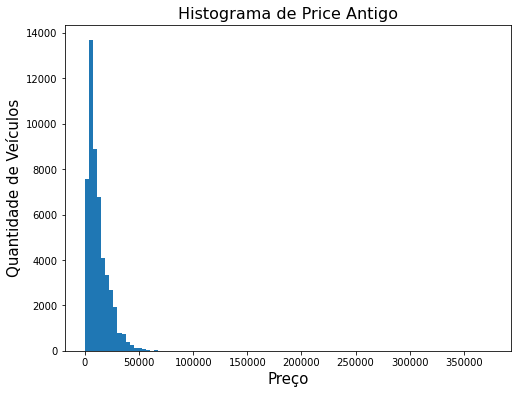

None

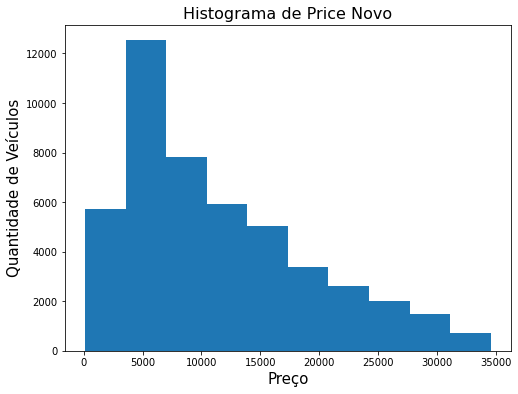

None

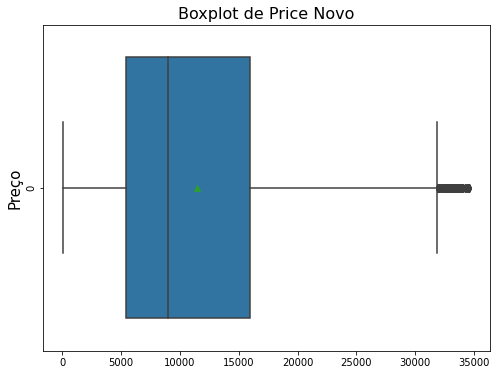

None

In [62]:
# Histograma de Price Antigo
display(hist_graph(df['price'], 100, (df['price'].min(),df['price'].max()) ,'Histograma de Price Antigo', 'Preço'))

# Histograma de Price Novo
display(hist_graph(df_clean['price'], 10, (df_clean['price'].min(),df_clean['price'].max()) ,'Histograma de Price Novo', 'Preço'))

# Boxplot de Price
display(box_graph(df_clean['price'], 'Boxplot de Price Novo', 'Preço'))

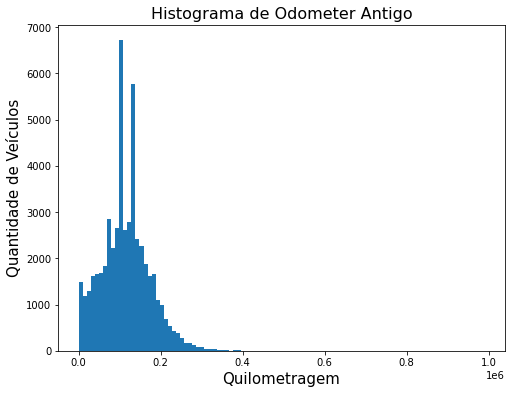

None

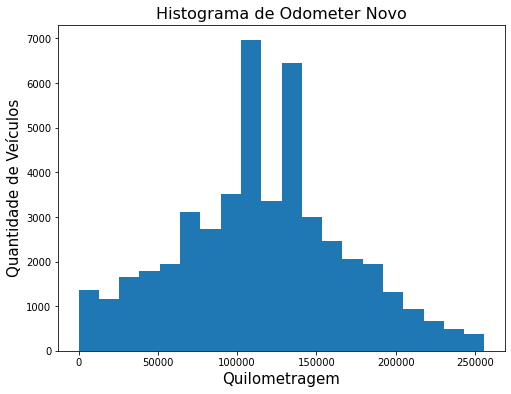

None

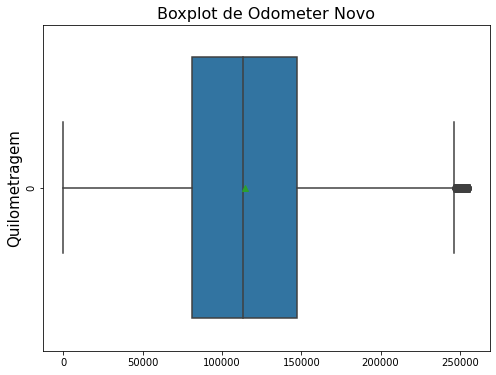

None

In [63]:
# Histograma de Odometer
display(hist_graph(df['odometer'], 100, (df['odometer'].min(),df['odometer'].max()) ,'Histograma de Odometer Antigo', 'Quilometragem'))

display(hist_graph(df_clean['odometer'], 20, (df_clean['odometer'].min(),df_clean['odometer'].max()) ,'Histograma de Odometer Novo', 'Quilometragem'))

# Boxplot de Odometer
display(box_graph(df_clean['odometer'], 'Boxplot de Odometer Novo', 'Quilometragem'))



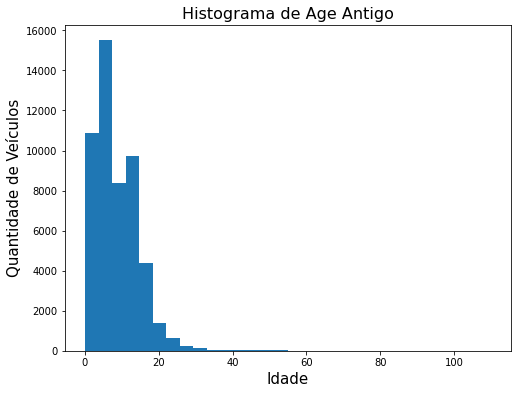

None

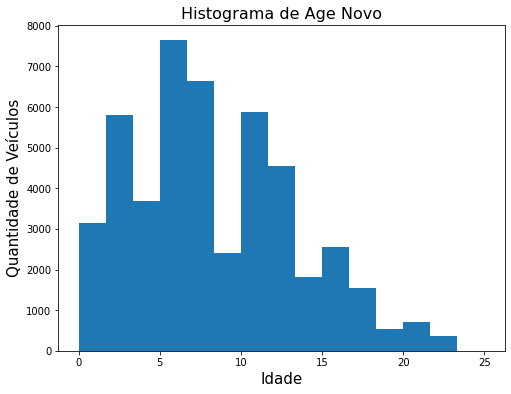

None

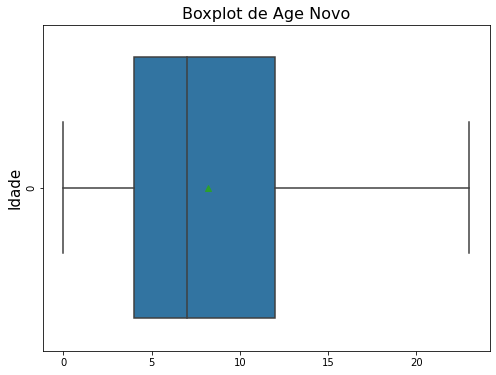

None

In [64]:
# Histograma de Age
display(hist_graph(df['age'], 30, (df['age'].min(),df['age'].max()) ,'Histograma de Age Antigo', 'Idade'))

display(hist_graph(df_clean['age'], 15, (0,25) ,'Histograma de Age Novo', 'Idade'))

# Boxplot de Age
display(box_graph(df_clean['age'], 'Boxplot de Age Novo', 'Idade'))



A retirada dos valores atipícos permitiu uma análise mais clara. As conclusões sendem relação a preço, quilometragem, idade, cilindros e idade, sendo:

- O preço varia em até 35.000 dólares, com a maioria dos dados entre 5.000 e 15.000 dólares. 


- A quilometragem começa entre 0 e 250.000, carros com 0 quilômetros têm idade igual a zero, por serem carros novos. A idade está entre 0 e 23 anos, a maioria entre 5 e 10 anos, a maioria dos carros está sendo vendido com um tempo de uso, sendo possível perceber uma relação entre idade e quilometragem.


- Os cilindros mais comuns são de 8, 6 e 4. Os outros possuem uma quantidade desprezível em relação ao total.


- As condições mais comuns são "excelente" e "bom". Ambos representam a grande maioria dos dados.


## Tempo de vida das propagandas

Será visto por quantos dias as propagandas foram exibidas da coluna **`days_listed`**. Calcularei a média e a mediana. Descreverei o tempo de vida útil comum de uma propaganda. Determinando quando as propagandas foram removidas rapidamente, e quando elas foram listadas por um tempo anormalmente longo.

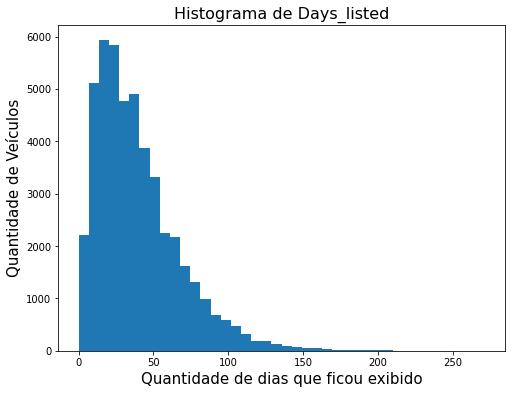

None

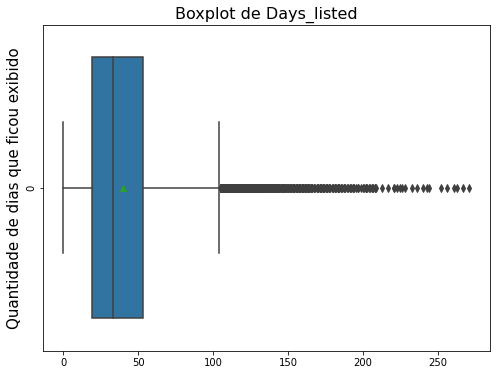

None

In [65]:
#Histograma de days_listed
display(hist_graph(df_clean['days_listed'], 40, (df_clean['days_listed'].min(),df_clean['days_listed'].max()) ,'Histograma de Days_listed', 'Quantidade de dias que ficou exibido'))

# Boxplot de Age
display(box_graph(df_clean['days_listed'], 'Boxplot de Days_listed', 'Quantidade de dias que ficou exibido'))


In [66]:
print('Média:')
print(df['days_listed'].mean())

print('\nMediana:')
print(df['days_listed'].median())

Média:
39.55475982532751

Mediana:
33.0


In [67]:
print('Número de propagandas retiradas em até 1 dia:')
print(len(df_clean.query('days_listed <2')))

Número de propagandas retiradas em até 1 dia:
214


In [68]:
days_listed_IQR = df_clean['days_listed'].quantile(0.75) - df_clean['days_listed'].quantile(0.25)
days_listed_lim = df_clean['days_listed'].quantile(0.75) +  1.5 * days_listed_IQR

print('Tempo considerado anormalmente longo:')
print(f'{days_listed_lim} dias')

print('\nQuantidade de propagandas que ficaram acima de um tempo anormalmente longo:')
print(len(df_clean.query('days_listed >= @days_listed_lim')))

print('\nEm porcentagem:')
print(len(df_clean.query('days_listed >= @days_listed_lim')) / len(df_clean['days_listed']))

Tempo considerado anormalmente longo:
104.0 dias

Quantidade de propagandas que ficaram acima de um tempo anormalmente longo:
1560

Em porcentagem:
0.03298724915945952


In [69]:
print('Quantidade de propagandas que ficaram em um tempo normal:')
print(len(df_clean.query('days_listed < @days_listed_lim')))

print(f'\n50% das propagandas ficaram entre {df_clean["days_listed"].quantile(0.25)} e {df_clean["days_listed"].quantile(0.75)} dias')



Quantidade de propagandas que ficaram em um tempo normal:
45731

50% das propagandas ficaram entre 19.0 e 53.0 dias


## Média de preços por cada tipo de veículo

Analisarei o número de propagandas e o preço médio para cada tipo de veículo. Construindo um gráfico mostrando a dependência do número de propagandas em relação ao tipo de veículo.

In [70]:
df_clean.pivot_table(index='type',values='price',aggfunc=[lambda x: round(x.mean(), 1),'median','count'])

,<lambda>,median,count
,price,price,price
type,,,
SUV,10717.1,8980.0,11596
bus,18107.4,28990.0,21
convertible,13481.4,12997.5,330
coupe,14073.9,13990.0,1935
hatchback,6918.0,5995.0,993
mini-van,8086.4,6500.0,1139
offroad,14503.3,12500.0,180
other,10587.6,8995.0,232


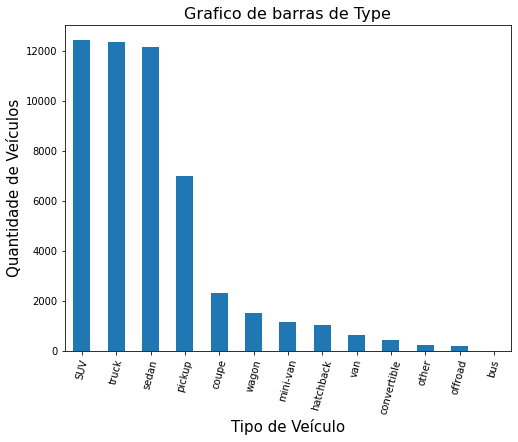

In [71]:
# Grafico de barras de Type
bar_graph(df['type'], 'Grafico de barras de Type', 'Tipo de Veículo')

In [72]:
len(df.query('(type=="SUV") or (type=="truck")')) / len(df['price'])

0.48050460941290635

SUV e truck são os tipos mais comuns de veículo. Sepresentam 48% do dataframe.

## Fatores de preço

Analisarei quais fatores impactam mais o preço. Os parâmetros idade, quilometragem, condição, tipo de transmissão e cor foram escolhidos para ver a dependencia, por possuirem correlação com o preço (visto na matriz de correlação). Para variáveis continuas serão usados gráficos de dispersão, para as variáveis categóricas (tipo de transmissão e cor) serão usados gráficos de extremos e quartis.

In [73]:
def scatter_graph(data, title, xlabel):
    plt.figure(figsize=(8, 6))
    plt.scatter( data, df_clean['price'])
    plt.title(title)
    plt.ylabel('Preço')
    plt.xlabel(xlabel)

In [74]:
def box_double_graph(dt, title, xlabel):
    plt.figure(figsize = ((9,7)))
    sns.boxplot(data=df_clean, x= dt, y='price')
    plt.title(title, fontsize = 16)
    plt.ylabel('Preço')
    plt.xlabel(xlabel)
    plt.show()

In [75]:
display(df_clean.corr())

,price,model_year,cylinders,odometer,is_4wd,days_listed,day_posted,age,odo_year,condition_index
price,1.000000,0.552851,0.350412,-0.453549,0.358747,-0.001784,0.000415,-0.550781,0.256847,0.200342
model_year,0.552851,1.000000,-0.171937,-0.513410,-0.031671,-0.002168,0.000921,-0.995749,0.528640,0.256245
cylinders,0.350412,-0.171937,1.000000,0.136509,0.407845,0.003533,-0.006218,0.171321,-0.059272,-0.092462
odometer,-0.453549,-0.513410,0.136509,1.000000,0.072498,0.005377,0.001276,0.511153,0.083124,-0.295197
is_4wd,0.358747,-0.031671,0.407845,0.072498,1.000000,0.002933,0.002575,0.031369,0.012625,-0.006689
days_listed,-0.001784,-0.002168,0.003533,0.005377,0.002933,1.000000,0.002323,0.003097,0.000405,0.001139
day_posted,0.000415,0.000921,-0.006218,0.001276,0.002575,0.002323,1.000000,-0.001380,0.000628,0.001892
age,-0.550781,-0.995749,0.171321,0.511153,0.031369,0.003097,-0.001380,1.000000,-0.537304,-0.254985
odo_year,0.256847,0.528640,-0.059272,0.083124,0.012625,0.000405,0.000628,-0.537304,1.000000,0.036083
condition_index,0.200342,0.256245,-0.092462,-0.295197,-0.006689,0.001139,0.001892,-0.254985,0.036083,1.000000


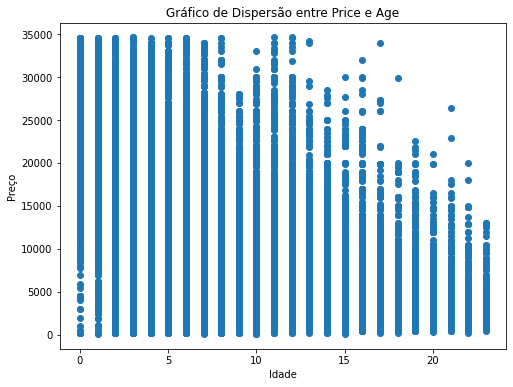

In [76]:
scatter_graph(df_clean['age'], 'Gráfico de Dispersão entre Price e Age', 'Idade')

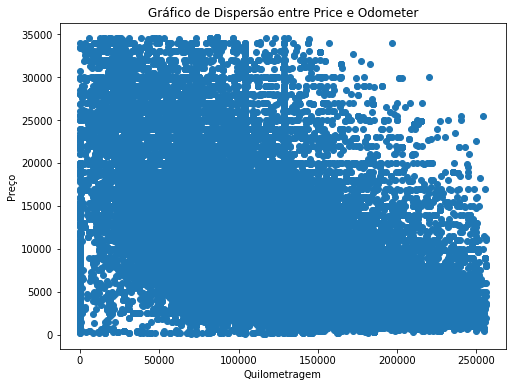

In [77]:
scatter_graph(df_clean['odometer'], 'Gráfico de Dispersão entre Price e Odometer', 'Quilometragem')

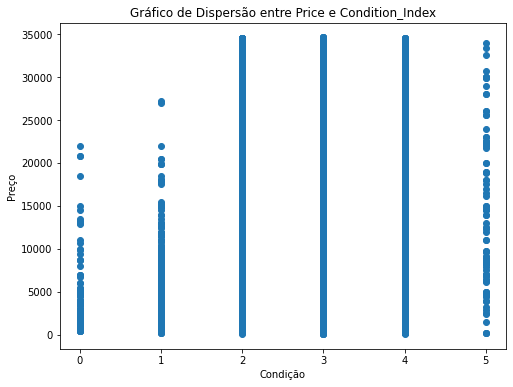

In [78]:
scatter_graph(df_clean['condition_index'], 'Gráfico de Dispersão entre Price e Condition_Index', 'Condição')

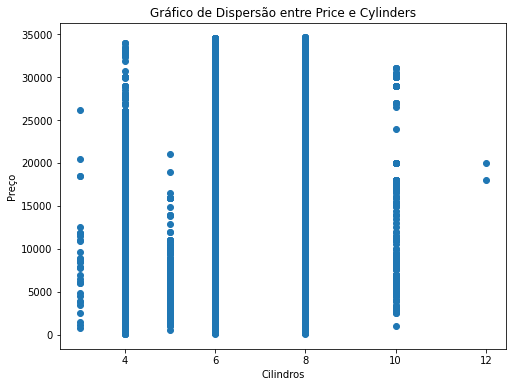

In [79]:
scatter_graph(df_clean['cylinders'], 'Gráfico de Dispersão entre Price e Cylinders', 'Cilindros')

In [80]:
df_clean['cylinders'].value_counts()

6     16306
8     15360
4     15079
5       271
10      240
3        33
12        2
Name: cylinders, dtype: int64

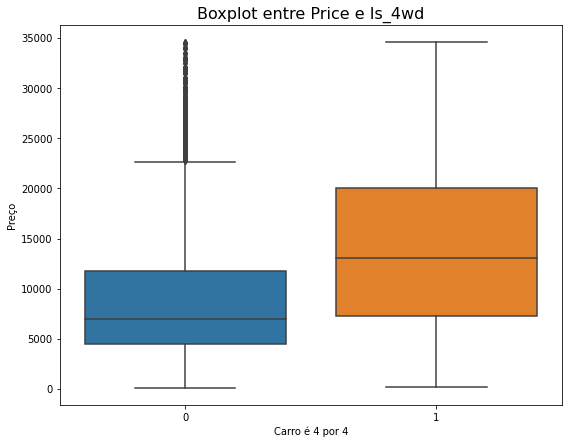

In [81]:
box_double_graph('is_4wd', 'Boxplot entre Price e Is_4wd','Carro é 4 por 4')

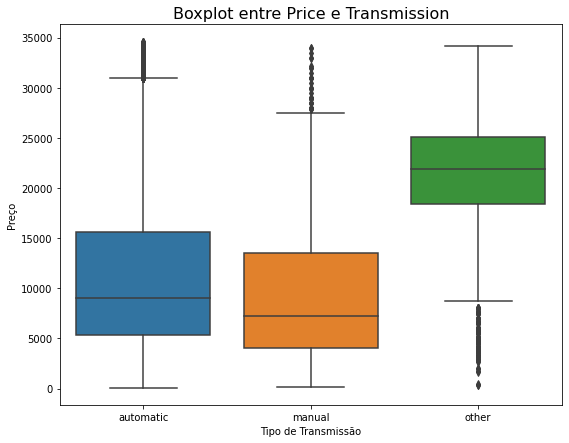

In [82]:
box_double_graph('transmission', 'Boxplot entre Price e Transmission','Tipo de Transmissão')

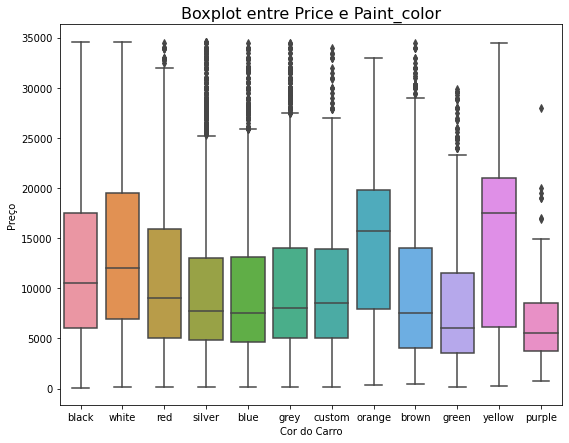

In [83]:
box_double_graph('paint_color', 'Boxplot entre Price e Paint_color','Cor do Carro')

A conclusão que chego sobre a relação entre as variáveis:

- Os gráficos demonstram que a partir de 10 anos de idade os preços tendem a diminuir, com apartir 20 anos não a preços acima de 15000. Mostrando que o valor médio de venda do carro tende a cair com sua idade.


- A partir de 150000 quilometros o preço médio tende a cair, em 250000 quilometros o preço não está acima de 10000 dolares. A quilometragem também tem uma relação negativa com o preço.


- Carros em baixa condição tendem a não serem vendidos por um alto preço dolares, mas apartir da condição boa, se torna irrelevante. A relação seria positiva, então torna-se constante.


- Em relação a quantidade de cilindros , os de "3" "12" não possuem um número suficiente para a analise. A quantidade de cilindros parece não afetar o preço.


- O tipo de transmissão possue um preço mediano parecido entre transmissão manual e automatica, o tipo "other" possui uma mediana maior mas com alta variancia. A cor do carro tem uma mediana parecida entre si, não demonstra afetar o preço.


## Conclusão geral

Pré-Processamento dos Dados

A primeira fase da análise consistiu em fazer uma primeira visualização dos dados para procurar problemas. Foram encontrados valores ausentes, colunas com tipos de dados incorretos e duplicatas implícitas. Os valores ausentes foram os primeiros a serem tratados.

As colunas model_year, cylinders, odometer, paint_color e is_4wd possuíam valores ausentes. Cada uma delas foi tratada de uma forma diferente:

    is_4wd: é uma variável booleana, sendo 1 representando sim e 0 representando não. Os valores 0 estavam como nan. Foram substituídos os nan por 0.

    paint_color: foi substituído usando a moda da cor do carro em relação ao modelo. Foi feito desta forma, pois intuitivamente, a cor do carro deve possuir relação com o modelo. Não foi encontrada uma causa para a existência dos valores ausentes.

    cylinders: foi substituído usando a moda em relação ao modelo. Existe relação entre a quantidade de cilindros e o modelo de carro. Não foi encontrada uma causa para a existência dos valores ausentes.

    odometer: foi substituído usando a mediana em relação à condição do carro. Não foi encontrada uma causa para a existência dos valores ausentes.

    model_year: foi substituído usando a mediana em relação ao modelo. Não foi encontrada uma causa para a existência dos valores ausentes.

Depois de resolvidos os valores ausentes, foram tratadas as duplicatas implícitas da coluna model. A correção do tipo de dados foi feita para as colunas is_4wd, model_year e cylinders, que foram transformadas em int64, e para a coluna date_posted, que foi transformada em datetime.

Foram adicionadas quatro colunas para enriquecer a análise. Foi adicionada uma coluna para o dia em que a propaganda foi postada, uma para a idade do veículo, uma para a quilometragem por ano e uma para representar a coluna de condição por meio de números.





Análise de Dados

Os primeiros parâmetros estudados para entender o que afeta o preço foram a idade do veículo, quilometragem, número de cilindros, condição do veículo e o próprio preço. Os valores atípicos afetaram a visualização, foi criado um novo dataframe sem os valores atípicos.

Análises Univariadas:

    O preço varia em até 35.000 dólares, com a maioria dos dados entre 5.000 e 15.000 dólares.
    A quilometragem começa entre 0 e 250.000. Carros com 0 quilômetros têm idade igual a zero.
    A idade está entre 0 e 23 anos, a maioria entre 5 e 10 anos.
    Os cilindros mais comuns são de 8, 6 e 4.
    As condições mais comuns são "excelente" e "bom".

Análises Multivariadas:

Os tipos mais comuns de carro são "SUV", "truck" e "sedan". "SUV" tem um preço mediano de 8980 dolares, "truck" de 14995 dolares e "sedan" de 5999 dolares.

Os gráficos demonstram que a partir de 10 anos os preços tendem a diminuir, com apartir 20 anos não a preços acima de 15000. A partir de 150000 quilometros o preço médio tende a cair, em 250000 quilometros o preço não está acima de 10000 dolares. Carros em baixa condição tendem a não serem vendidos por um alto preço dolares, mas apartir da condição boa, se torna irrelevante. Em relação a quantidade de cilindros , os de "3" "12" não possuem um número suficiente para a analise. A quantidade de cilindros parece não afetar o preço. O tipo de transmissão possue um preço mediano parecido entre transmissão manual e automatica, mas o tipo "other" tende a possuir uma mediana maior mas com alta variancia. A cor do para possui uma mediana parecida entre as corre, não demonstra afetar o preço. Concluo que, a partir da minha análise, a idade e quilometragem do carro são as variáveis que mais afetam o preço